In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cols = ['mass','temp','grav']
data = pd.read_csv('my_data_file.dat',names=cols, skipinitialspace=True, sep=None)
data['lum'] = 1
#set the luminosities from mass-lum relations
for i,row in enumerate(data.iterrows()):
    if row[1][0] < 0.43:
        data['lum'][i] = 0.23*data['mass'][i]**2.3
    else:
        data['lum'][i] = data['mass'][i]**4

/tmp/ipykernel_159425/1563908948.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('my_data_file.dat',names=cols, skipinitialspace=True, sep=None)
/tmp/ipykernel_159425/1563908948.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lum'][i] = 0.23*data['mass'][i]**2.3


In [3]:
#check that the data looks reasonable
data

,mass,temp,grav,lum
0,0.075,2002.0,5.393,0.000595
1,0.080,2315.0,5.350,0.000690
2,0.090,2643.0,5.291,0.000905
3,0.100,2814.0,5.250,0.001153
4,0.110,2923.0,5.218,0.001435
5,0.130,3057.0,5.168,0.002108
6,0.150,3154.0,5.131,0.002929
7,0.175,3238.0,5.091,0.004176
8,0.200,3295.0,5.054,0.005677
9,0.250,3379.0,4.992,0.009484


Text(0.5, 1.0, 'HR diagram')

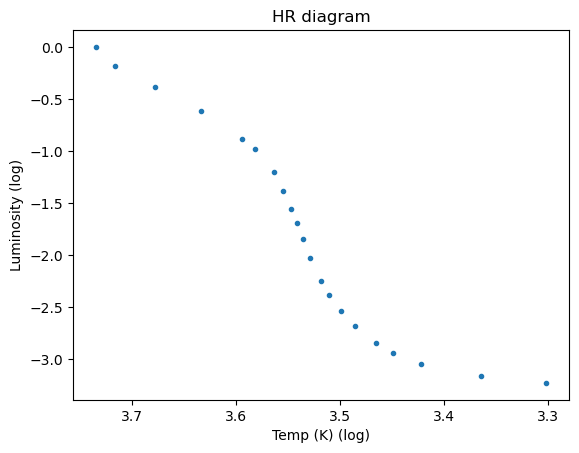

In [4]:
#plot HR diagram with log-log
#looks okay
xax = np.log10(data['temp'])
yax = np.log10(data['lum'])
hr,plot1 = plt.subplots(1,1)
plot1.plot(xax,yax,'.')
plot1.invert_xaxis()
plot1.set_xlabel('Temp (K) (log)')
plot1.set_ylabel('Luminosity (log)')
plot1.set_title('HR diagram')

In [5]:
#stellar mass vs planetary orbital distance
#IMPORTANT: the paper says the following equations do not work for Teff less than 3700 and to assume that Teff is actually 3700 for any stars with temps smaller
#the following line implements that assumption
for i,row in enumerate(data.iterrows()):
    if data['temp'][i] < 3700:
        data['temp'][i] = 3700

#eq 2
ain = 2.7619E-5
bin = 3.8095E-9
def lin(linP,sdata):
    lin = (linP - ain*(sdata['temp']-5700) - bin*(sdata['temp']-5700)**2)*sdata['lum']**0.5
    return lin

#eq 3
aout = 1.3786E-4
bout = 1.4286E-9
def lout(loutP,sdata):
    lout = (loutP - aout*(sdata['temp']-5700) - bout*(sdata['temp']-5700)**2)*sdata['lum']**0.5
    return lout

In [6]:
#check that the data looks how I think it is supposed to look
data

,mass,temp,grav,lum
0,0.075,3700.0,5.393,0.000595
1,0.080,3700.0,5.350,0.000690
2,0.090,3700.0,5.291,0.000905
3,0.100,3700.0,5.250,0.001153
4,0.110,3700.0,5.218,0.001435
5,0.130,3700.0,5.168,0.002108
6,0.150,3700.0,5.131,0.002929
7,0.175,3700.0,5.091,0.004176
8,0.200,3700.0,5.054,0.005677
9,0.250,3700.0,4.992,0.009484


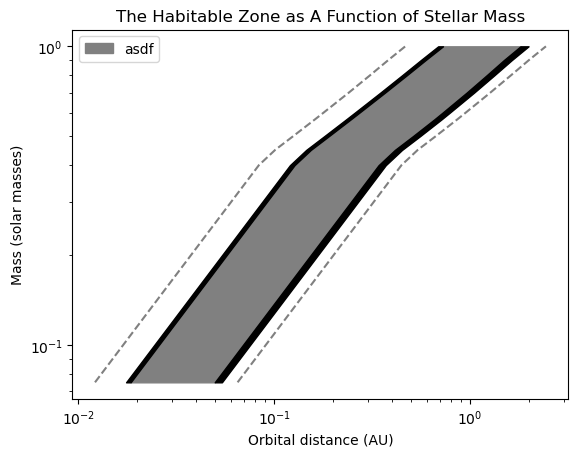

In [10]:
#plot orbital distance vs mass

x1 = lin(0.72,data)
x2 = lout(1.77,data)
x3 = lin(0.68,data)
x4 = lout(1.95,data)

hab, ax = plt.subplots(1,1)

ax.fill_betweenx(data['mass'],x1,x2,color='gray',label='')
ax.fill_betweenx(data['mass'],x1,x3,color='black')
ax.fill_betweenx(data['mass'],x2,x4,color='black')

ax.plot(lin(0.46,data),data['mass'],'--',color='gray')
ax.plot(lout(2.4,data),data['mass'],'--',color='gray')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Orbital distance (AU)')
ax.set_ylabel('Mass (solar masses)')
ax.set_title('The Habitable Zone as A Function of Stellar Mass')
ax.legend()

#why not flattening out at the end like in the paper?
#-maybe mass-luminosity relationship is wrong
#-maybe this is just what our data looks like? Plot not wrong?